In [133]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
matplotlib.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

## Feature Selection

Feature Selection is the automatic selection of attributes in your data (such as columns in tabular data) that are most relevant to the predictive modeling problem you are working on.

Top reasons to use feature selection are:

- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces overfitting.


In [134]:
o = pd.read_csv('Ozone1.csv', index_col='Unnamed: 0')

The prediction will be made on O3 as it it closely represents a class. There are 38 categories in the O3 column, out of 330 entries. 

In [135]:
o[:1]

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
1,3,5710,4,28,40,2693,-25,87,250,33


In [136]:
from sklearn.ensemble import RandomForestClassifier
X = o[['vh','wind','humidity','temp','ibh','dpg','ibt','vis','doy']]
y = o[['O3']]
names = X.columns.values
rfc = RandomForestClassifier()
rfc.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.1449, 'ibt'), (0.13439999999999999, 'humidity'), (0.12529999999999999, 'temp'), (0.1216, 'dpg'), (0.11310000000000001, 'doy'), (0.1052, 'vh'), (0.098400000000000001, 'ibh'), (0.091800000000000007, 'vis'), (0.065299999999999997, 'wind')]


In [170]:
print ('Top 5 features of the dataset:')
print (sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True)[0:5])

Top 5 features of the dataset:
[(0.1449, 'ibt'), (0.13439999999999999, 'humidity'), (0.12529999999999999, 'temp'), (0.1216, 'dpg'), (0.11310000000000001, 'doy')]


## Factor Analysis
Study the Factor Analysis tutorial in R here:
http://yatani.jp/teaching/doku.php?id=hcistats:fa

Then conduct FA on the modified States.XX (statemodx77.csv) data set.  
Explain 
- What FA is in the context of this data set, 
- What it does
- Interpret your results.  
- Why is it useful?		

Factor analysis is another technique we can use to reduce dimensionality. However, factor analysis makes assumptions and PCA does not. The basic assumption is that there are implicit features responsible for the features of the dataset.

Factor Analysis aims to find the explicit features from the sample in an attempt to understand the independent variables as much as the dependent variables.

Factor Analysis is a simple linear generative model with Gaussian latent variables.
The observations are assumed to be caused by a linear transformation of lower dimensional latent factors and added Gaussian noise.

Factor Analysis in the context of this data should be able to select the most important features when it comes to predicting the class of the region.

These results are very hard to interpret as the matrix is so large. I imagine this would be easier to determine given a smaller amount of features in the dataset. I can definitely see that there is often a negative relationship between features of the dataset.  

I had to engineer the the confusion matrix to show how the data features relate to one another. The relationship is more visible now. 

In [155]:
s = pd.read_csv('statemodx77.csv', index_col=['Unnamed: 0', 'Unnamed: 9'])
s['region'] = pd.factorize(s.region)[0]
s['region'] = s['region'].astype('category')
s.head()

,,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,region,SATV,SATM,percent,dollars,pay
,Unnamed: 9,,,,,,,,,,,,,,
Alabama,AL,3615,3624,2.1,69.05,15.1,41.3,20,50708,0,470,514,8,3.648,27
Alaska,AK,365,6315,1.5,69.31,11.3,66.7,152,566432,1,438,476,42,7.887,43
Arizona,AZ,2212,4530,1.8,70.55,7.8,58.1,15,113417,2,445,497,25,4.231,30
Arkansas,AR,2110,3378,1.9,70.66,10.1,39.9,65,51945,3,470,511,6,3.334,23
California,CA,21198,5114,1.1,71.71,10.3,62.6,20,156361,1,419,484,45,4.826,39


In [156]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
cols = [col for col in s.columns if col != 'region']
X = s[cols]
y = s[['region']]

In [175]:
from sklearn import decomposition, preprocessing

data_normal = preprocessing.scale(X) 
fa = decomposition.FactorAnalysis()
fa.fit(data_normal)
print (fa.get_precision())
print ("---------------------")
print (fa.score(X))

[[ 1.08783785 -0.13157478 -0.10129511 -0.04594657 -0.15914628  0.04608012
   0.17810589  0.02439528  0.03910466 -0.03847752 -0.00516153 -0.09469535
  -0.25705638]
 [-0.13157478  1.73601349  0.20191579 -0.13613516 -0.00509862 -0.40748486
  -0.05873311 -0.2672419   0.03459432 -0.06584831 -0.065856   -0.31296511
  -0.53216526]
 [-0.10129511  0.20191579  1.82235387  0.27647192 -0.47601639  0.31714331
   0.30244013 -0.04088292  0.12856222  0.14665232  0.06486861  0.12459329
   0.05504567]
 [-0.04594657 -0.13613516  0.27647192  1.42516149  0.43481682 -0.26267693
   0.05691504  0.1263527  -0.10844444 -0.19594496 -0.03918191  0.03001806
  -0.01555895]
 [-0.15914628 -0.00509862 -0.47601639  0.43481682  1.67466334  0.19462832
   0.23056731 -0.25180441  0.09604756  0.10361669  0.20425899  0.09339223
  -0.09312618]
 [ 0.04608012 -0.40748486  0.31714331 -0.26267693  0.19462832  1.53155849
  -0.06900818 -0.23574529 -0.0095661  -0.07702263  0.0064356   0.01458997
  -0.11701358]
 [ 0.17810589 -0.05873

In [184]:
cf = pd.DataFrame(fa.get_precision()) 
cf.columns = X.columns
cf['indx'] = X.columns
cf = cf.set_index('indx')

In [185]:
cf

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,SATV,SATM,percent,dollars,pay
indx,,,,,,,,,,,,,
Population,1.087838,-0.131575,-0.101295,-0.045947,-0.159146,0.046080,0.178106,0.024395,0.039105,-0.038478,-0.005162,-0.094695,-0.257056
Income,-0.131575,1.736013,0.201916,-0.136135,-0.005099,-0.407485,-0.058733,-0.267242,0.034594,-0.065848,-0.065856,-0.312965,-0.532165
Illiteracy,-0.101295,0.201916,1.822354,0.276472,-0.476016,0.317143,0.302440,-0.040883,0.128562,0.146652,0.064869,0.124593,0.055046
Life Exp,-0.045947,-0.136135,0.276472,1.425161,0.434817,-0.262677,0.056915,0.126353,-0.108444,-0.195945,-0.039182,0.030018,-0.015559
Murder,-0.159146,-0.005099,-0.476016,0.434817,1.674663,0.194628,0.230567,-0.251804,0.096048,0.103617,0.204259,0.093392,-0.093126
HS Grad,0.046080,-0.407485,0.317143,-0.262677,0.194628,1.531558,-0.069008,-0.235745,-0.009566,-0.077023,0.006436,0.014590,-0.117014
Frost,0.178106,-0.058733,0.302440,0.056915,0.230567,-0.069008,1.218356,-0.016313,-0.161870,-0.095810,0.011871,-0.177601,-0.013834
Area,0.024395,-0.267242,-0.040883,0.126353,-0.251804,-0.235745,-0.016313,1.033960,-0.032347,-0.037920,0.167917,0.031703,-0.099309
SATV,0.039105,0.034594,0.128562,-0.108444,0.096048,-0.009566,-0.161870,-0.032347,2.139993,-0.755265,0.689846,0.174601,0.215827


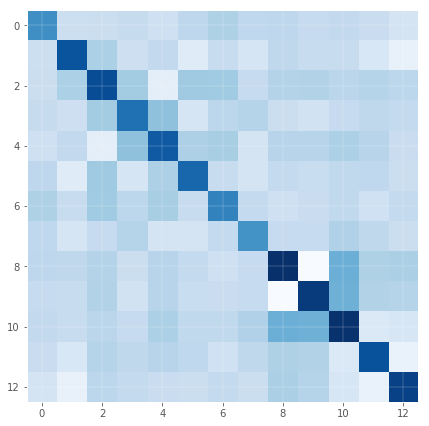

In [186]:
plt.imshow(cf, cmap='Blues')

## Principal Components Analysis
Conduct PCA on the modified States.XX data set.  
Explain 
- What PCA is in the context of this data set, 
- What it does: A principal component is a normalized linear combination of the original predictors in a data set.
- Interpret your results.  
- Why is it useful?			

PCA is used to overcome features redundancy in a data set.
These features are low dimensional in nature.
These features a.k.a components are a resultant of normalized linear combination of original predictor variables.
These components aim to capture as much information as possible with high explained variance.
The first component has the highest variance followed by second, third and so on.
Normalizing data becomes extremely important when the predictors are measured in different units.
PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.
PCA is applied on a data set with numeric variables.
PCA is a tool which helps to produce better visualizations of high dimensional data.

The plot below shows that ~ 3 components explains around 80% variance in the data set. In order words, using PCA we have reduced 13 predictors to 3 without compromising on explained variance. 


In [158]:
len(s.columns)

14

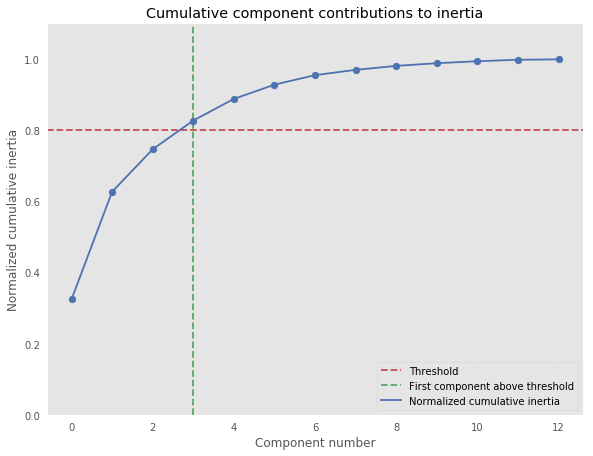

In [160]:
import prince

pca = prince.PCA(s, n_components=14)

fig1, ax1 = pca.plot_cumulative_inertia()

plt.show()

## Linear Discriminants Analysis

Then conduct LDA on the modified States.XX data set.  
Explain 
- What LDA is in the context of this data set, 
- What it does
- Interpret your results.  
- Why is it useful?		

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs.

LDA is closely related to analysis of variance (ANOVA) and regression analysis, which also attempt to express one dependent variable as a linear combination of other features or measurements. However, ANOVA uses categorical independent variables and a continuous dependent variable, whereas discriminant analysis has continuous independent variables and a categorical dependent variable (i.e. the class label)

The below plot shows the predictors labeled with the color of the region label (1 - 38). 

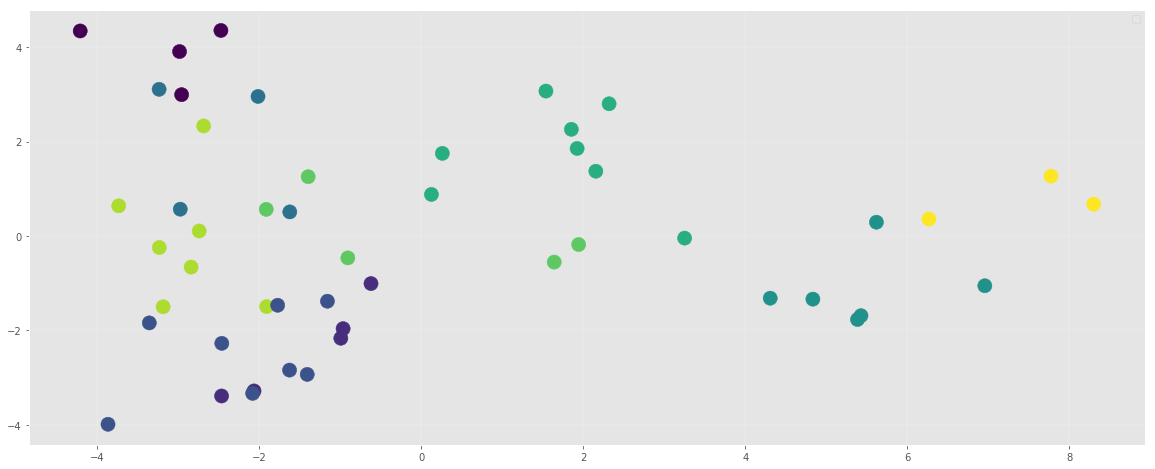

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_lda = lda.fit(X, y).transform(X)
plt.figure(figsize = (20,8))
plt.legend(y)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, s=200)

In [187]:
lda.get_params()

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}